# Objective

The purpose of this notebook is to do a brief exploration of the data for the confluence page

In [66]:
import pandas as pd

df_chars_train = pd.read_parquet("/home/azureuser/cloudfiles/code/Users/Fernando.Rodriguez/ainn-eliza-rnd-data/multimodal_dataloader_v1/data/brandbank_all_examples_all_groups/splits/brandbank_all_examples_all_groups_train/chars.parquet")
df_descriptions_train = pd.read_parquet("/home/azureuser/cloudfiles/code/Users/Fernando.Rodriguez/ainn-eliza-rnd-data/multimodal_dataloader_v1/data/brandbank_all_examples_all_groups/splits/brandbank_all_examples_all_groups_train/descriptions.parquet")

df_chars_val = pd.read_parquet("/home/azureuser/cloudfiles/code/Users/Fernando.Rodriguez/ainn-eliza-rnd-data/multimodal_dataloader_v1/data/brandbank_all_examples_all_groups/splits/brandbank_all_examples_all_groups_val/chars.parquet")
df_descriptions_val = pd.read_parquet("/home/azureuser/cloudfiles/code/Users/Fernando.Rodriguez/ainn-eliza-rnd-data/multimodal_dataloader_v1/data/brandbank_all_examples_all_groups/splits/brandbank_all_examples_all_groups_val/descriptions.parquet")

df_chars_test = pd.read_parquet("/home/azureuser/cloudfiles/code/Users/Fernando.Rodriguez/ainn-eliza-rnd-data/multimodal_dataloader_v1/data/brandbank_all_examples_all_groups/splits/brandbank_all_examples_all_groups_test/chars.parquet")
df_descriptions_test = pd.read_parquet("/home/azureuser/cloudfiles/code/Users/Fernando.Rodriguez/ainn-eliza-rnd-data/multimodal_dataloader_v1/data/brandbank_all_examples_all_groups/splits/brandbank_all_examples_all_groups_test/descriptions.parquet")

In [67]:
df_chars = pd.concat([df_chars_train, df_chars_val, df_chars_test])
df_descriptions = pd.concat([df_descriptions_train, df_descriptions_val, df_descriptions_test])

In [68]:
print(f"PRODUCT DESCRIPTIONS: {df_descriptions['PRODUCT_ID'].nunique()}")
print(f"PRODUCT_IDs: {df_descriptions.shape[0]}")

PRODUCT DESCRIPTIONS: 262062
PRODUCT_IDs: 2378149


# Analysis

In [69]:
import matplotlib.pyplot as plt

def analyze_column(column_name, data, text_move):
    # Calculate value counts for the specified column
    value_counts = data[column_name].value_counts()

    # Define the ranges for the buckets
    ranges = [1, 10, 100, 1000, value_counts.max()]

    # Count the number of values falling within each range
    count_in_ranges = pd.cut(value_counts, bins=ranges).value_counts().sort_index()

    # Increase the figure size for more space
    plt.figure(figsize=(5, 3))

    # Plot a diagram with counts on top of each bar
    ax = count_in_ranges.plot(kind='bar')
    plt.title(f'Number of {column_name}s with different ranges of counts', pad=20)  # Adjust the padding for title
    plt.xlabel(f'Ranges of PRODUCT_ID counts per {column_name}')
    plt.ylabel(f'Number of {column_name}s')

    # Display count numbers on top of each bar
    for i, v in enumerate(count_in_ranges):
        ax.text(i, v + text_move, str(v), ha='center')

    # Set a lower limit for the y-axis
    plt.ylim(0, count_in_ranges.max() * 1.2)

    # Print the total number of items in the column
    total_items = len(value_counts)
    print(f"Total number of {column_name}s: {total_items}")

    # Calculate percentages for each bucket
    percentages = (count_in_ranges / len(value_counts)) * 100

    # Display percentages for each bucket
    for i, (range_, count) in enumerate(zip(percentages.index, percentages)):
        print(f"{count:.2f}% of {column_name}s have between {range_.left} and {range_.right} examples")

    plt.show()

def top_values_with_counts(column_name, data):
    # Calculate value counts for the specified column
    value_counts = data[column_name].value_counts()

    # Display the top N values with their counts
    top_values = value_counts.head(10)
    print(f"Top 10 values for {column_name} with their counts:")
    return pd.DataFrame(top_values)

## 1 - PRODUCT_GROUP

Total number of PRODUCT_GROUPs: 260
11.92% of PRODUCT_GROUPs have between 1 and 10 examples
21.92% of PRODUCT_GROUPs have between 10 and 100 examples
33.08% of PRODUCT_GROUPs have between 100 and 1000 examples
30.77% of PRODUCT_GROUPs have between 1000 and 17536 examples


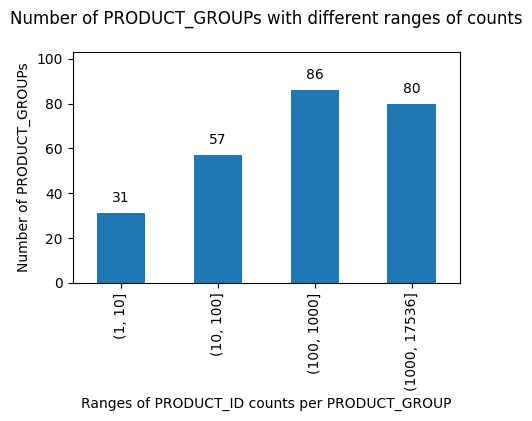

Top 10 values for PRODUCT_GROUP with their counts:


,count
PRODUCT_GROUP,
MEAT/POULTRY/GAME - FRESH FIXED WEIGHT,17536
WINE - LIGHT/TABLE STYLES,7926
DIPS/DRESSINGS/SAUCES - AMBIENT,7166
SNACKS - FIXED WEIGHT,6613
CHOCOLATE/CHOCOLATE SUBSTITUTES - FIXED WEIGHT,6034
HAIR CARE,5555
DESSERTS - FRESH,5385
SUGAR/CANDY - FIXED WEIGHT,5192
CHEESE - FRESH FIXED WEIGHT,4867


In [70]:
analyze_column("PRODUCT_GROUP", df_chars, 5)
top_values_with_counts("PRODUCT_GROUP", df_chars)

## 2 - MODULE

Total number of MODULEs: 1660
27.35% of MODULEs have between 1 and 10 examples
36.27% of MODULEs have between 10 and 100 examples
25.12% of MODULEs have between 100 and 1000 examples
3.07% of MODULEs have between 1000 and 7712 examples


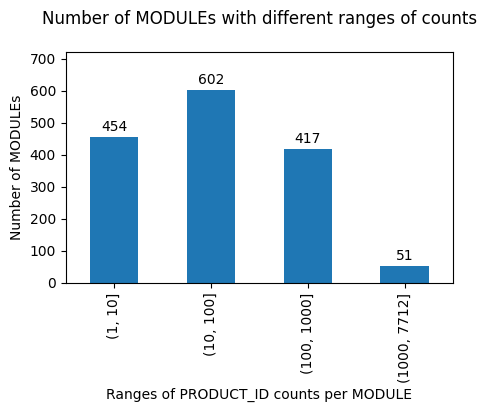

Top 10 values for MODULE with their counts:


,count
MODULE,
WINE - STILL - GRAPE BASED,7712
BEER,4377
MEAT CUTS/JOINTS/WHOLE - UNPREPARED - UNCOOKED - FRESH,3692
BANDED PACKS - HEALTHCARE & PERSONAL CARE & BEAUTY PRODUCTS,3662
BISCUITS - SWEET - HANDHELD - AMBIENT,3549
CHEESE NATURAL (HARD/SOFT) MULTI PORTION FRESH FIXED WEIGHT,3226
MEAT PRODUCTS - SLICED/DICED MEATS (EXC SAUSAGES) - READY TO EAT - FRESH,3211
SKIN CARE - CREAM/GEL/LIQUID - MULTI DOSE,3010
MEAT CUTS/JOINTS/WHOLE - PREPARED - UNCOOKED - FRESH,2871


In [71]:
analyze_column("MODULE", df_chars, 20)
top_values_with_counts("MODULE", df_chars)

## 3 - GLOBAL_PACKAGING

Total number of GLOBAL_PACKAGINGs: 33
6.06% of GLOBAL_PACKAGINGs have between 1 and 10 examples
12.12% of GLOBAL_PACKAGINGs have between 10 and 100 examples
27.27% of GLOBAL_PACKAGINGs have between 100 and 1000 examples
54.55% of GLOBAL_PACKAGINGs have between 1000 and 145359 examples


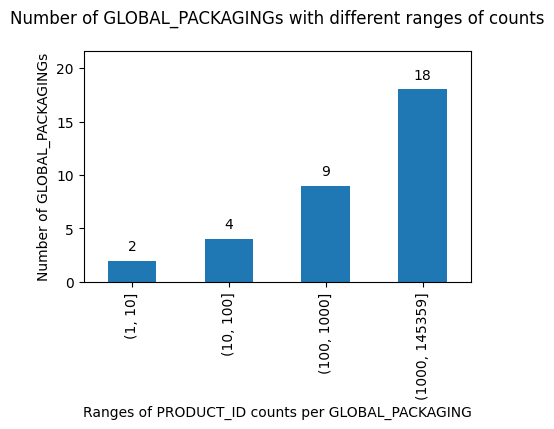

Top 10 values for GLOBAL_PACKAGING with their counts:


,count
GLOBAL_PACKAGING,
OUT OF SCOPE,145359
BOTTLE,32169
BOX,23065
BAG,11666
CAN,8619
PACKET,8245
POT,4886
POUCH,4802
TUBE,3418


In [72]:
analyze_column("GLOBAL_PACKAGING", df_chars, 1)
top_values_with_counts("GLOBAL_PACKAGING", df_chars)